In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
matplotlib 3.0.2
numpy 1.18.1
pandas 1.0.1
sklearn 0.20.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [11]:
learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rate:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
#     model.summary()
#     model.compile(loss="mean_squared_error", optimizer="sgd")
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 5,
                    callbacks = callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 121us/sample - loss: 5.1421 - val_loss: 4.6997
Epoch 2/5
11610/11610 [==============================] - 1s 50us/sample - loss: 3.8262 - val_loss: 3.6653
Epoch 3/5
11610/11610 [==============================] - 0s 37us/sample - loss: 3.0322 - val_loss: 2.9983
Epoch 4/5
11610/11610 [==============================] - 0s 32us/sample - loss: 2.5088 - val_loss: 2.5328
Epoch 5/5
11610/11610 [==============================] - 0s 35us/sample - loss: 2.1371 - val_loss: 2.1849
Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 48us/sample - loss: 4.1567 - val_loss: 2.6153
Epoch 2/5
11610/11610 [==============================] - 0s 33us/sample - loss: 1.8213 - val_loss: 1.3398
Epoch 3/5
11610/11610 [==============================] - 0s 32us/sample - loss: 1.0907 - val_loss: 0.9369
Epoch 4/5
11610/11610 [==============================

H:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1261: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


11610/11610 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan
Epoch 3/5
11610/11610 [==============================] - 0s 31us/sample - loss: nan - val_loss: nan
Epoch 4/5
11610/11610 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan
Epoch 5/5
11610/11610 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan


lr: 0.0001


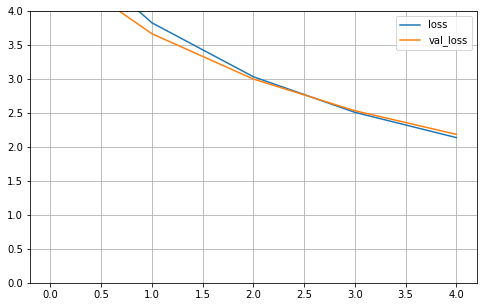

lr: 0.0003


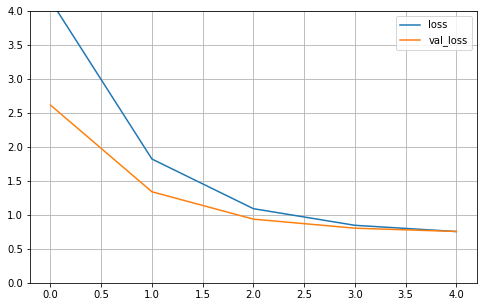

lr: 0.001


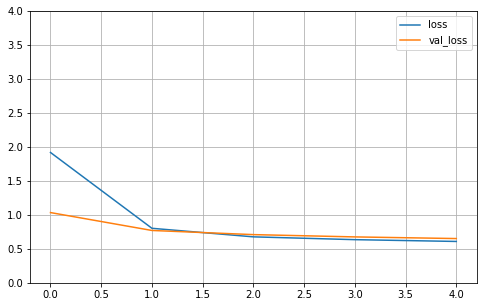

lr: 0.003


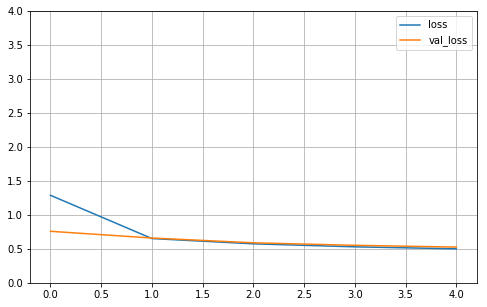

lr: 0.01


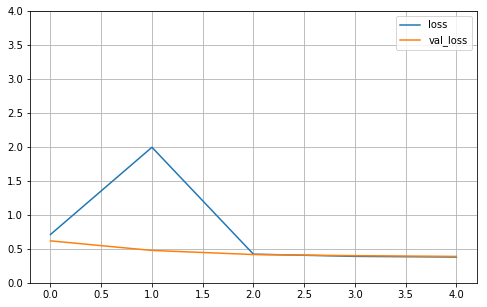

lr: 0.03


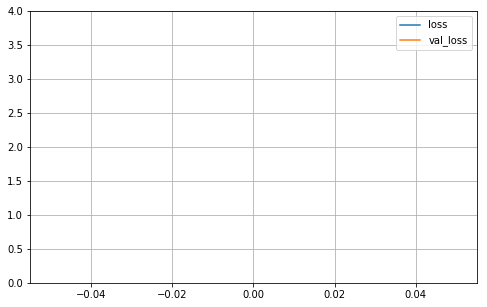

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 4)
    plt.show()
for lr, history in zip(learning_rate, histories):
    print('lr:', lr)
    plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 52us/sample - loss: 0.3915


0.3914947641912357

In [15]:
learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]

def build_model(hidden_layers=1, layer_size=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation='relu',
                                input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(layer_size, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)
history = sklearn_model.fit(x_train_scaled, y_train,
                validation_data = (x_valid_scaled, y_valid),
                epochs = 5,
                callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 44us/sample - loss: 1.2324 - val_loss: 0.7199
Epoch 2/5
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6055 - val_loss: 0.6251
Epoch 3/5
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5489 - val_loss: 0.5712
Epoch 4/5
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5108 - val_loss: 0.5362
Epoch 5/5
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4888 - val_loss: 0.5197


In [19]:
from scipy.stats import reciprocal

param_distribution = {
    'hidden_layers': [1, 2, 3],
    'layer_size': np.arange(1, 100),
    'learning_rate': reciprocal(1e-4, 1e-2)
}

from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(sklearn_model,
                                     param_distribution,
                                     n_iter=10,
                                     n_jobs=1)
random_search_cv.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 65us/sample - loss: 1.3042 - val_loss: 0.7142
Epoch 2/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6471 - val_loss: 0.6410
Epoch 3/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5852 - val_loss: 0.5889
Epoch 4/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5416 - val_loss: 0.5569
Epoch 5/5
7740/7740 [==============================] - 0s 16us/sample - loss: 0.4869
Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 0s 63us/sample - loss: 1.3169 - val_loss: 0.7150
Epoch 2/5
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6074 - val_loss: 0.6173
Epoch 3/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5419 - val_loss: 0.5671
Epoch 4/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5040 - val_

7740/7740 [==============================] - 0s 38us/sample - loss: 1.0903 - val_loss: 1.0062
Epoch 4/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.8550 - val_loss: 0.8634
Epoch 5/5
7740/7740 [==============================] - 0s 17us/sample - loss: 0.7093
Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 0s 63us/sample - loss: 3.6548 - val_loss: 2.4376
Epoch 2/5
7740/7740 [==============================] - 0s 37us/sample - loss: 1.7985 - val_loss: 1.4001
Epoch 3/5
7740/7740 [==============================] - 0s 37us/sample - loss: 1.1836 - val_loss: 1.0337
Epoch 4/5
7740/7740 [==============================] - 0s 37us/sample - loss: 0.9242 - val_loss: 0.8683
Epoch 5/5
7740/7740 [==============================] - 0s 16us/sample - loss: 0.7451
Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 0s 62us/sample - loss: 3.5519 - val_loss: 2.3696
Epoch 2/5
7740/7

7740/7740 [==============================] - 0s 16us/sample - loss: 1.3919
Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 67us/sample - loss: 4.3521 - val_loss: 3.8267
Epoch 2/5
7740/7740 [==============================] - 0s 39us/sample - loss: 3.0776 - val_loss: 2.7439
Epoch 3/5
7740/7740 [==============================] - 0s 38us/sample - loss: 2.2241 - val_loss: 2.0462
Epoch 4/5
7740/7740 [==============================] - 0s 39us/sample - loss: 1.7056 - val_loss: 1.6450
Epoch 5/5
7740/7740 [==============================] - 0s 16us/sample - loss: 1.3032
Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 0s 63us/sample - loss: 1.4610 - val_loss: 0.7337
Epoch 2/5
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6672 - val_loss: 0.6568
Epoch 3/5
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6036 - val_loss: 0.6026
Epoch 4/5
7740/7

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001FB903C7FD0>,
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'hidden_layers': [1, 2, 3], 'layer_size': array([ 1,  2, ..., 98, 99]), 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FB938BA4E0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [22]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'hidden_layers': 3, 'layer_size': 49, 'learning_rate': 0.00794006229182883}
-0.3922239237130458


In [23]:
model = random_search_cv.best_estimator_.model
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3829


0.3829048568888228